## Programming Exercise 3

- Importance of regularization
- Multi-class classification

### Part 1 : Regularization

In [39]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import sys
# load MATLAB files
from scipy.io import loadmat

from sklearn.model_selection import train_test_split

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression

import cv2

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

('Dimensions: ', (118, 3))
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


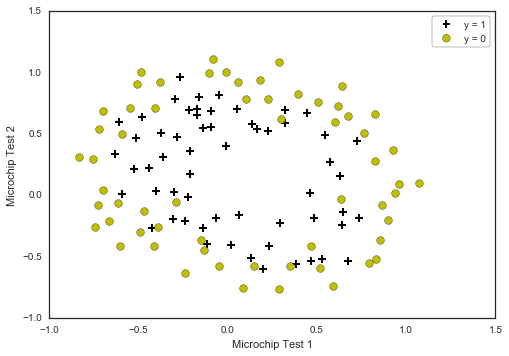

In [40]:
data2 = loaddata('data/ex2data2.txt', ',')

y2 = np.c_[data2[:,2]]
X2 = data2[:,0:2]

plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

##### Question 1 : Try to change the value of lmbda and check its influence. What is the best value of lmbda ?

Original data size :  (118, 2)
Transformed data size :  (118, 28)
Accuracy 83.0508474576


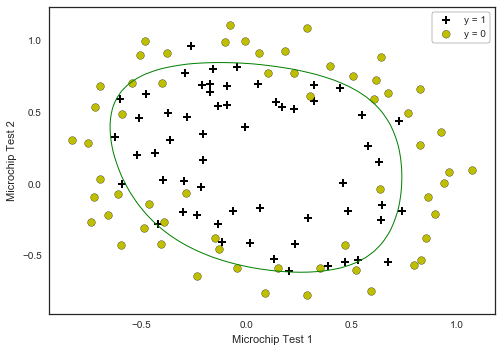

In [41]:
poly = PolynomialFeatures(6)
print 'Original data size : ', data2[:,0:2].shape
XX = poly.fit_transform(data2[:,0:2])
print 'Transformed data size : ', XX.shape

poly = PolynomialFeatures(6)

lmbda = 1.0
c = 1.0 / (lmbda + 1e-8)
regr = LogisticRegression(C=c)
regr.fit(XX, y2.ravel())
initial_theta2 = np.zeros(XX.shape[1])

# Accuracy
regr.predict(XX)
accuracy = 100.0*sum(regr.predict(XX) == y2.ravel())/y2.size    
print 'Accuracy', accuracy

# Scatter plot of X,y
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

# Plot decisionboundary
x1_min, x1_max = X2[:,0].min(), X2[:,0].max(),
x2_min, x2_max = X2[:,1].min(), X2[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
# h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
h = regr.predict_proba( poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]) )
h = h[:, 0]
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');


### Part 2 : Multiclass classification

Here we are going to perform classification on MNIST characters dataset. We are going to use logistic regression with one vs all strategy to perfrom multiclass classification

In [42]:
# load the data
data = loadmat('data/ex3data1.mat')

y = data['y']
X = np.c_[data['X']]
classlist = np.unique(y)


print('X: {} '.format(X.shape))
print('y: {}'.format(y.shape))
print 'Number of classes : ', classlist.size


X: (5000, 400) 
y: (5000, 1)
Number of classes :  10


**Here are examples of the data we are working on**

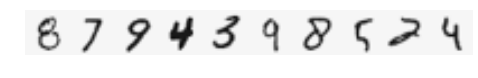

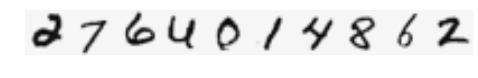

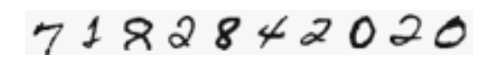

In [43]:
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample,:].reshape(-1,20).T)
plt.axis('off');
plt.figure()
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample,:].reshape(-1,20).T)
plt.axis('off');
plt.figure()
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample,:].reshape(-1,20).T)
plt.axis('off');



**We split our data to 80% train and 20% test data**

In [44]:
# Split : 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print 'Number of training example : ', X_train.shape[0]
print 'Number of testing example : ', X_test.shape[0]

print  X_train[(y_train == 1).flatten(), :].shape

Number of training example :  4000
Number of testing example :  1000
(394, 400)


** Question 2 : complete this code in order to learn one classifier per class (using scikit library) : **

With scikit learning is done as follow: 
```python
    classif = LogisticRegression()
    classif.fit(X, y)
    ```
Where X contains the data and y the labels. We should be learning 10 classifiers, one per class.

In [50]:
# learning 10 classifiers one for each letter
classifiers = {}
for i in classlist:
    print 'Learning ',i,
    classif = LogisticRegression()
    # your code here. Hint : you should first set labels then call `fit`
    classifiers[i] = classif
    print ' .. done'
    


Learning  1  .. done
Learning  2  .. done
Learning  3  .. done
Learning  4  .. done
Learning  5  .. done
Learning  6  .. done
Learning  7  .. done
Learning  8  .. done
Learning  9  .. done
Learning  10  .. done


**After training, we test the learned classifiers on our test data**

In [46]:
accuracies = []
for i in classlist:
    current_y = (y_test == i).flatten()
    pred = classifiers[i].predict(X_test)
    accuracy = 100.0*sum(pred == current_y.ravel())/current_y.size 
    accuracies.append(accuracy)
    
    print 'Accuracy for class', i, ':', accuracy

print 'Mean Accuracy over all classes :', np.mean(accuracies)


Accuracy for class 1 : 99.3
Accuracy for class 2 : 97.3
Accuracy for class 3 : 98.1
Accuracy for class 4 : 98.5
Accuracy for class 5 : 96.8
Accuracy for class 6 : 98.6
Accuracy for class 7 : 98.3
Accuracy for class 8 : 95.0
Accuracy for class 9 : 95.8
Accuracy for class 10 : 99.2
Mean Accuracy over all classes : 97.69


** Question 3 : complete the code in order to implement 1 vs all classification. ``predictClassOneVsAll`` function receives one example, classifies it with all the classifiers previously learnt. The class obtaining best probability is picked **

Hint : for a given classifier `classif`, the method `classif.predict_proba(x)` returns the probabilities and not predicted class

In [47]:
def predictClassOneVsAll(x):
    pred = []
    for cls in classlist:
        prob = 0;
        # your code here
        pred.append(prob)
    am = np.argmax(pred)
    predicted = classlist[am]
    
    return predicted

Image 0 guessed : 5 | Annotation : 5
Image 1 guessed : 9 | Annotation : 9
Image 2 guessed : 1 | Annotation : 1
Image 3 guessed : 10 | Annotation : 10
Image 4 guessed : 7 | Annotation : 7
Image 5 guessed : 9 | Annotation : 9
Image 6 guessed : 2 | Annotation : 2
Image 7 guessed : 5 | Annotation : 5
Image 8 guessed : 6 | Annotation : 6
Image 9 guessed : 3 | Annotation : 3


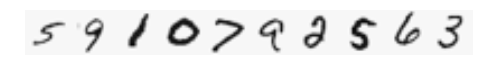

In [48]:
sample = np.random.choice(X_test.shape[0], 10)

cc = 0
for i in sample:
    x = [X_test[i,:]];
    predicted = predictClassOneVsAll(x)
    print 'Image', cc, 'guessed :', predicted, '| Annotation :', y_test[i, 0]
    cc=cc+1;

plt.imshow(X_test[sample,:].reshape(-1,20).T)
plt.axis('off');

** Question 4 : evaluate the overall performance of our system**

The accuracy is defined as 
$$Accuracy = \frac{N_{correct}}{N_{total}},$$

where $N_{correct}$ is the number of examples correctly classified and $N_{total}$ the total number of examples

In [49]:
nbcorrect = 0.0
for i in range(X_test.shape[0]):
    x = [X_test[i,:]];
    predicted = predictClassOneVsAll(x)
    # your code here

total = X_test.shape[0]
nbfalse = total - nbcorrect
print 'Nb correct :', nbcorrect
print 'Nb False :', nbfalse
print 'Total :', total

print 'Accuracy :', nbcorrect  / total

Nb correct : 913.0
Nb False : 87.0
Total : 1000
Accuracy : 0.913
